In [348]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib as ml
import seaborn as sb

In [305]:
# Read Excel file
df=pd.read_excel('data.xlsx')

In [307]:
df.head()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,...,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default
0,420825,50578,58400,89.55,67,22807,45,1441,1984-01-01,Salaried,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
1,417566,53278,61360,89.63,67,22807,45,1497,1985-08-24,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
2,539055,52378,60300,88.39,67,22807,45,1495,1977-12-09,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1
3,529269,46349,61500,76.42,67,22807,45,1502,1988-06-01,Salaried,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
4,563215,43594,78256,57.50,67,22744,86,1499,1994-07-14,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0


In [308]:
# Structure of the data
df.shape

(233154, 41)

In [309]:
# Information about Data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233154 entries, 0 to 233153
Data columns (total 41 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   UniqueID                             233154 non-null  int64         
 1   disbursed_amount                     233154 non-null  int64         
 2   asset_cost                           233154 non-null  int64         
 3   ltv                                  233154 non-null  float64       
 4   branch_id                            233154 non-null  int64         
 5   supplier_id                          233154 non-null  int64         
 6   manufacturer_id                      233154 non-null  int64         
 7   Current_pincode_ID                   233154 non-null  int64         
 8   Date.of.Birth                        233154 non-null  datetime64[ns]
 9   Employment.Type                      225493 non-null  object        
 

In [311]:
# Finding missing values
null_unique = pd.DataFrame()
null_unique['nulls']=pd.Series(df.isnull().sum())
null_unique['unique']=pd.Series(df.nunique())
null_unique

,nulls,unique
UniqueID,0,233154
disbursed_amount,0,24565
asset_cost,0,46252
ltv,0,6579
branch_id,0,82
supplier_id,0,2953
manufacturer_id,0,11
Current_pincode_ID,0,6698
Date.of.Birth,0,15433
Employment.Type,7661,2


In [312]:
# Finding duplicates
duplicate_count = df.duplicated().sum()
print(duplicate_count)

0


In [313]:
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 0


In [314]:
# Inspect the current column names
print(df.columns)

# function to convert Variable name
def to_valid_identifier(name):
    return name.lower().replace('.','_').replace(' ','_')

df.columns = [to_valid_identifier(col) for col in df.columns]
df.head()


Index(['UniqueID', 'disbursed_amount', 'asset_cost', 'ltv', 'branch_id',
       'supplier_id', 'manufacturer_id', 'Current_pincode_ID', 'Date.of.Birth',
       'Employment.Type', 'DisbursalDate', 'State_ID', 'Employee_code_ID',
       'MobileNo_Avl_Flag', 'Aadhar_flag', 'PAN_flag', 'VoterID_flag',
       'Driving_flag', 'Passport_flag', 'PERFORM_CNS.SCORE',
       'PERFORM_CNS.SCORE.DESCRIPTION', 'PRI.NO.OF.ACCTS', 'PRI.ACTIVE.ACCTS',
       'PRI.OVERDUE.ACCTS', 'PRI.CURRENT.BALANCE', 'PRI.SANCTIONED.AMOUNT',
       'PRI.DISBURSED.AMOUNT', 'SEC.NO.OF.ACCTS', 'SEC.ACTIVE.ACCTS',
       'SEC.OVERDUE.ACCTS', 'SEC.CURRENT.BALANCE', 'SEC.SANCTIONED.AMOUNT',
       'SEC.DISBURSED.AMOUNT', 'PRIMARY.INSTAL.AMT', 'SEC.INSTAL.AMT',
       'NEW.ACCTS.IN.LAST.SIX.MONTHS', 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS',
       'AVERAGE.ACCT.AGE', 'CREDIT.HISTORY.LENGTH', 'NO.OF_INQUIRIES',
       'loan_default'],
      dtype='object')


,uniqueid,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,current_pincode_id,date_of_birth,employment_type,...,sec_sanctioned_amount,sec_disbursed_amount,primary_instal_amt,sec_instal_amt,new_accts_in_last_six_months,delinquent_accts_in_last_six_months,average_acct_age,credit_history_length,no_of_inquiries,loan_default
0,420825,50578,58400,89.55,67,22807,45,1441,1984-01-01,Salaried,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
1,417566,53278,61360,89.63,67,22807,45,1497,1985-08-24,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
2,539055,52378,60300,88.39,67,22807,45,1495,1977-12-09,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1
3,529269,46349,61500,76.42,67,22807,45,1502,1988-06-01,Salaried,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
4,563215,43594,78256,57.50,67,22744,86,1499,1994-07-14,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0


In [315]:
# Renaming columns
df.rename(columns={'primary_instal_amt': 'primary_installment_amount', 
                   'sec_instal_amt': 'secondary_installment_amount'}, inplace=True)

In [316]:
print(df.columns)


Index(['uniqueid', 'disbursed_amount', 'asset_cost', 'ltv', 'branch_id',
       'supplier_id', 'manufacturer_id', 'current_pincode_id', 'date_of_birth',
       'employment_type', 'disbursaldate', 'state_id', 'employee_code_id',
       'mobileno_avl_flag', 'aadhar_flag', 'pan_flag', 'voterid_flag',
       'driving_flag', 'passport_flag', 'perform_cns_score',
       'perform_cns_score_description', 'pri_no_of_accts', 'pri_active_accts',
       'pri_overdue_accts', 'pri_current_balance', 'pri_sanctioned_amount',
       'pri_disbursed_amount', 'sec_no_of_accts', 'sec_active_accts',
       'sec_overdue_accts', 'sec_current_balance', 'sec_sanctioned_amount',
       'sec_disbursed_amount', 'primary_installment_amount',
       'secondary_installment_amount', 'new_accts_in_last_six_months',
       'delinquent_accts_in_last_six_months', 'average_acct_age',
       'credit_history_length', 'no_of_inquiries', 'loan_default'],
      dtype='object')


In [318]:
# Finding % of null values
missing_percentage = (df.isnull().sum() / df.shape[0]) * 100
print(missing_percentage)

uniqueid                               0.000000
disbursed_amount                       0.000000
asset_cost                             0.000000
ltv                                    0.000000
branch_id                              0.000000
supplier_id                            0.000000
manufacturer_id                        0.000000
current_pincode_id                     0.000000
date_of_birth                          0.000000
employment_type                        3.285811
disbursaldate                          0.000000
state_id                               0.000000
employee_code_id                       0.000000
mobileno_avl_flag                      0.000000
aadhar_flag                            0.000000
pan_flag                               0.000000
voterid_flag                           0.000000
driving_flag                           0.000000
passport_flag                          0.000000
perform_cns_score                      0.000000
perform_cns_score_description          0

In [319]:
categorical_columns = df.select_dtypes(include=['object']).columns
print(categorical_columns)

Index(['employment_type', 'perform_cns_score_description', 'average_acct_age',
       'credit_history_length'],
      dtype='object')


In [320]:
# Filling missing values using mode
for column in categorical_columns:
    df[column].fillna(df[column].mode()[0], inplace=True)

In [321]:
print(df[categorical_columns].isnull().sum())

employment_type                  0
perform_cns_score_description    0
average_acct_age                 0
credit_history_length            0
dtype: int64


In [322]:
# Statistical description
df.describe()

,uniqueid,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,current_pincode_id,state_id,employee_code_id,...,sec_overdue_accts,sec_current_balance,sec_sanctioned_amount,sec_disbursed_amount,primary_installment_amount,secondary_installment_amount,new_accts_in_last_six_months,delinquent_accts_in_last_six_months,no_of_inquiries,loan_default
count,233154.000000,233154.000000,2.331540e+05,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,...,233154.000000,2.331540e+05,2.331540e+05,2.331540e+05,2.331540e+05,2.331540e+05,233154.000000,233154.000000,233154.000000,233154.000000
mean,535917.573376,54356.993528,7.586507e+04,74.746530,72.936094,19638.635035,69.028054,3396.880247,7.262243,1549.477148,...,0.007244,5.427793e+03,7.295923e+03,7.179998e+03,1.310548e+04,3.232684e+02,0.381833,0.097481,0.206615,0.217071
std,68315.693711,12971.314171,1.894478e+04,11.456636,69.834995,3491.949566,22.141304,2238.147502,4.482230,975.261278,...,0.111079,1.702370e+05,1.831560e+05,1.825925e+05,1.513679e+05,1.555369e+04,0.955107,0.384439,0.706498,0.412252
min,417428.000000,13320.000000,3.700000e+04,10.030000,1.000000,10524.000000,45.000000,1.000000,1.000000,1.000000,...,0.000000,-5.746470e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,476786.250000,47145.000000,6.571700e+04,68.880000,14.000000,16535.000000,48.000000,1511.000000,4.000000,713.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
50%,535978.500000,53803.000000,7.094600e+04,76.800000,61.000000,20333.000000,86.000000,2970.000000,6.000000,1451.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
75%,595039.750000,60413.000000,7.920175e+04,83.670000,130.000000,23000.000000,86.000000,5677.000000,10.000000,2362.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.999000e+03,0.000000e+00,0.000000,0.000000,0.000000,0.000000
max,671084.000000,990572.000000,1.628992e+06,95.000000,261.000000,24803.000000,156.000000,7345.000000,22.000000,3795.000000,...,8.000000,3.603285e+07,3.000000e+07,3.000000e+07,2.564281e+07,4.170901e+06,35.000000,20.000000,36.000000,1.000000


In [323]:
# importing library
import matplotlib.pyplot as plt

In [324]:
# Finding count of default and non-default
target_distribution=df['loan_default'].value_counts()
print(target_distribution)

0    182543
1     50611
Name: loan_default, dtype: int64


In [325]:
# Finding % of default and non-default
target_percentage = df['loan_default'].value_counts(normalize=True) * 100
print(target_percentage)

0    78.292888
1    21.707112
Name: loan_default, dtype: float64


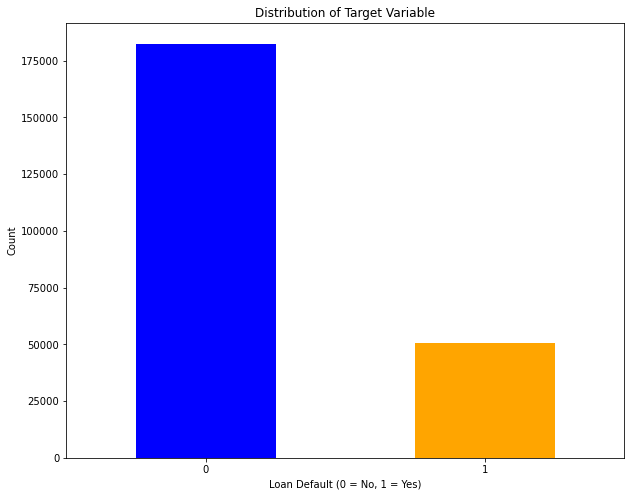

In [326]:
# plotting distribution of Target variable
target_count=df['loan_default'].value_counts()
plt.figure(figsize=(10,8))
target_count.plot(kind ='bar', color=['blue', 'orange'])
plt.title('Distribution of Target Variable')
plt.xlabel('Loan Default (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

In [327]:
# retreiving numerical data
num_columns=df._get_numeric_data().columns
print(num_columns)

Index(['uniqueid', 'disbursed_amount', 'asset_cost', 'ltv', 'branch_id',
       'supplier_id', 'manufacturer_id', 'current_pincode_id', 'state_id',
       'employee_code_id', 'mobileno_avl_flag', 'aadhar_flag', 'pan_flag',
       'voterid_flag', 'driving_flag', 'passport_flag', 'perform_cns_score',
       'pri_no_of_accts', 'pri_active_accts', 'pri_overdue_accts',
       'pri_current_balance', 'pri_sanctioned_amount', 'pri_disbursed_amount',
       'sec_no_of_accts', 'sec_active_accts', 'sec_overdue_accts',
       'sec_current_balance', 'sec_sanctioned_amount', 'sec_disbursed_amount',
       'primary_installment_amount', 'secondary_installment_amount',
       'new_accts_in_last_six_months', 'delinquent_accts_in_last_six_months',
       'no_of_inquiries', 'loan_default'],
      dtype='object')


In [328]:
df.head()

,uniqueid,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,current_pincode_id,date_of_birth,employment_type,...,sec_sanctioned_amount,sec_disbursed_amount,primary_installment_amount,secondary_installment_amount,new_accts_in_last_six_months,delinquent_accts_in_last_six_months,average_acct_age,credit_history_length,no_of_inquiries,loan_default
0,420825,50578,58400,89.55,67,22807,45,1441,1984-01-01,Salaried,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
1,417566,53278,61360,89.63,67,22807,45,1497,1985-08-24,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
2,539055,52378,60300,88.39,67,22807,45,1495,1977-12-09,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1
3,529269,46349,61500,76.42,67,22807,45,1502,1988-06-01,Salaried,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
4,563215,43594,78256,57.50,67,22744,86,1499,1994-07-14,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0


In [329]:
categorical_columns=['branch_id', 'supplier_id', 'manufacturer_id', 'state_id']

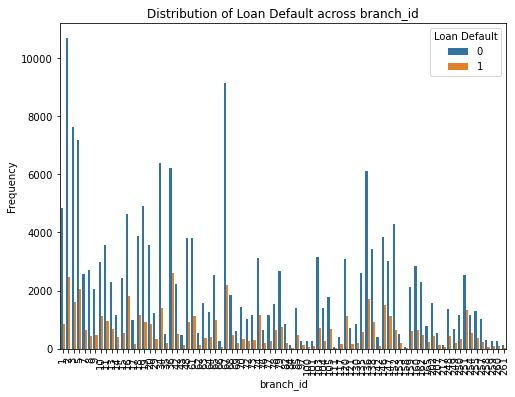

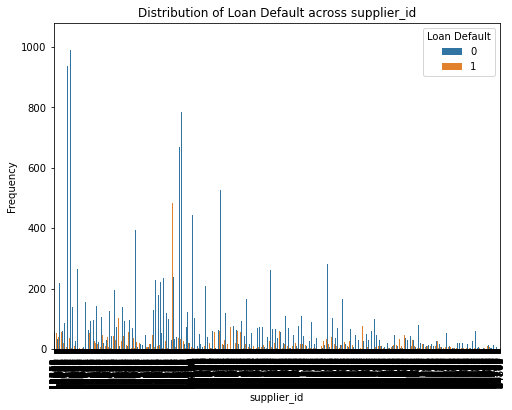

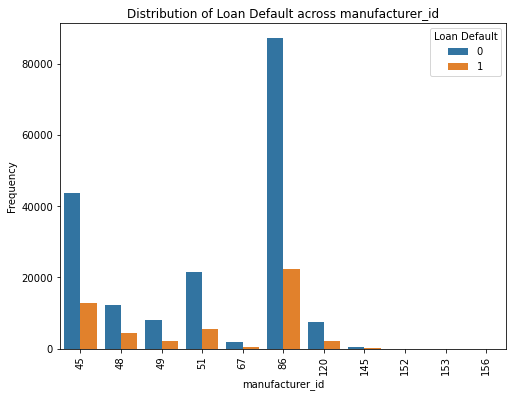

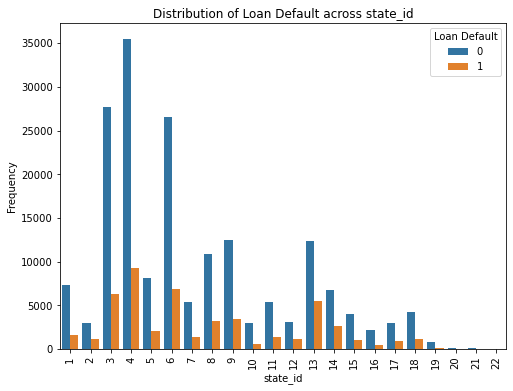

In [351]:
for columns in categorical_columns:
    plt.figure(figsize=(8,6))
    sb.countplot(x=columns, hue='loan_default', data=df)
    plt.title(f'Distribution of Loan Default across {columns}')
    plt.xlabel(columns)
    plt.ylabel('Frequency')
    plt.legend(title='Loan Default', loc='upper right')
    plt.xticks(rotation=90)
    plt.show()
    

In [331]:
unique_employment_types = df['employment_type'].unique()
print("Unique Employment Types:", unique_employment_types)

Unique Employment Types: ['Salaried' 'Self employed']


In [332]:
missing_values_count = df['employment_type'].isnull().sum()
print(f"Missing Values in Employment Type: {missing_values_count}")


Missing Values in Employment Type: 0


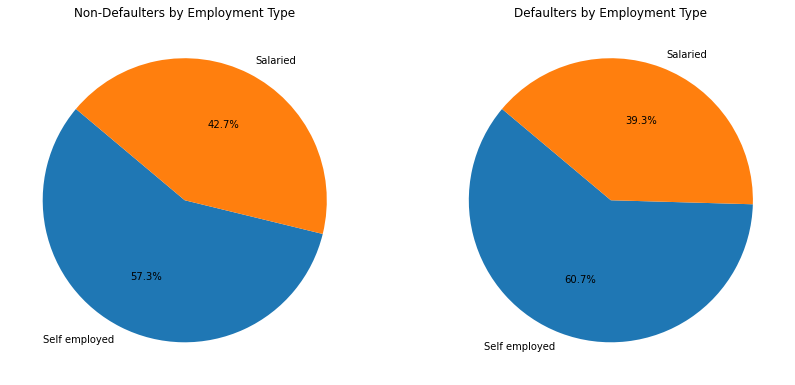

In [333]:
def pie_chart(data, column, target):
    non_defaulters = data[data[target] == 0][column].value_counts()
    defaulters = data[data[target] == 1][column].value_counts()
    
    # Create subplots
    fig, ax = plt.subplots(1, 2, figsize=(14, 7))  # Use plt.subplots()

    # Pie chart for Non-Defaulters
    ax[0].pie(non_defaulters, labels=non_defaulters.index, autopct='%1.1f%%', startangle=140)
    ax[0].set_title('Non-Defaulters by Employment Type')

    # Pie chart for Defaulters
    ax[1].pie(defaulters, labels=defaulters.index, autopct='%1.1f%%', startangle=140)  # Use defaulters.index
    ax[1].set_title('Defaulters by Employment Type')

    plt.show()

# Call the function
pie_chart(df, 'employment_type', 'loan_default')  

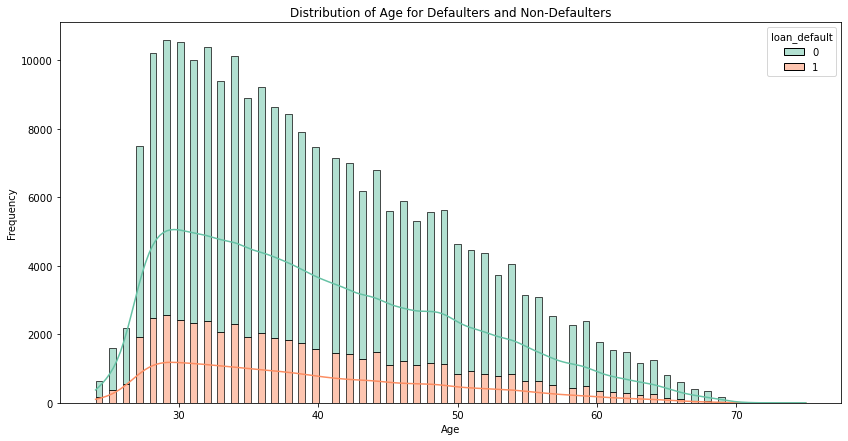

In [334]:
from datetime import datetime

current_year=datetime.now().year
df['date_of_birth']=pd.to_datetime(df['date_of_birth'],errors='coerce')
df['age']=current_year - df['date_of_birth'].dt.year

df=df.dropna(subset=['age'])

plt.figure(figsize=(14,7))

sb.histplot(data=df, x='age', hue='loan_default', multiple='stack', kde=True, palette='Set2')
plt.title('Distribution of Age for Defaulters and Non-Defaulters')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

ID proof count:aadhar_flag      195924
pan_flag          17621
voterid_flag      33794
driving_flag       5419
passport_flag       496
dtype: int64


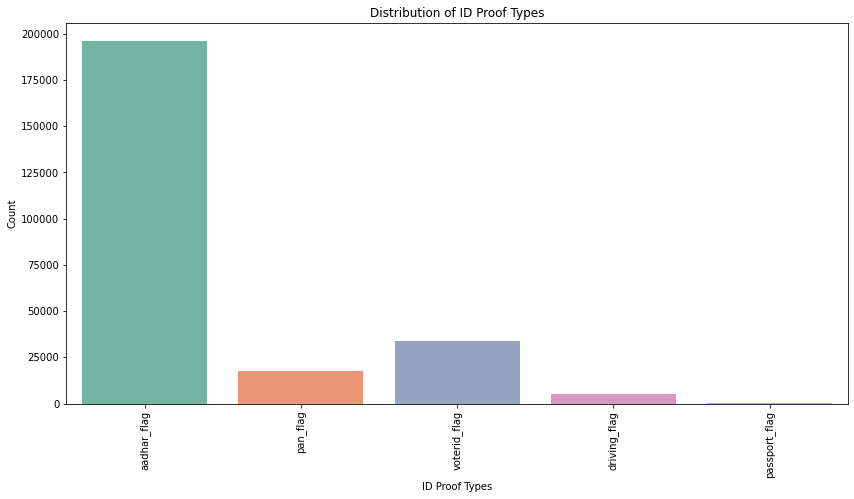

In [260]:
id_proof_columns = ['aadhar_flag', 'pan_flag', 'voterid_flag', 'driving_flag', 'passport_flag']

id_proof_columns = [col for col in id_proof_columns if col in df.columns]

if id_proof_columns:
    id_proof_counts = df[id_proof_columns].sum()
    
    print(f'ID proof count:{id_proof_counts}')
    
    
    plt.figure(figsize=(14, 7))
    sb.barplot(x=id_proof_counts.index, y=id_proof_counts.values, palette='Set2')
    plt.title('Distribution of ID Proof Types')
    plt.xlabel('ID Proof Types')
    plt.ylabel('Count')
    plt.xticks(rotation=90)
    plt.show()
else:
    print("None of the specified ID proof columns were found in the dataset.")
                    

In [261]:
unique_scores=df['perform_cns_score'].unique()
print(f"Unique values in perform_cns_score:{unique_scores}")

Unique values in perform_cns_score:[  0 890 884 879 878 873 870 869 868 867 864 863 862 859 858 855 853 852
 850 849 847 845 844 843 842 841 840 839 838 837 836 835 834 833 832 831
 830 829 828 827 826 825 824 823 822 821 820 819 818 817 816 815 814 813
 812 811 810 809 808 807 806 805 804 803 802 801 800 799 798 797 796 795
 794 793 792 791 790 789 788 787 786 785 784 783 782 781 780 779 778 777
 776 775 774 773 772 771 770 769 768 767 766 765 764 763 762 761 760 759
 758 757 756 755 754 753 752 751 750 749 748 747 746 745 744 743 742 741
 740 739 738 737 736 735 734 733 732 731 730 729 728 727 726 725 724 723
 722 721 720 719 718 717 716 715 714 713 712 711 710 709 708 707 706 705
 704 703 702 701 700 699 698 697 696 695 694 693 692 691 690 689 688 687
 686 685 684 683 682 681 680 679 678 677 676 675 674 673 672 671 670 669
 668 667 666 665 664 663 662 661 660 659 658 657 656 655 654 653 652 651
 650 649 648 647 646 645 644 643 642 641 640 639 638 637 636 635 634 633
 632 631 630 629

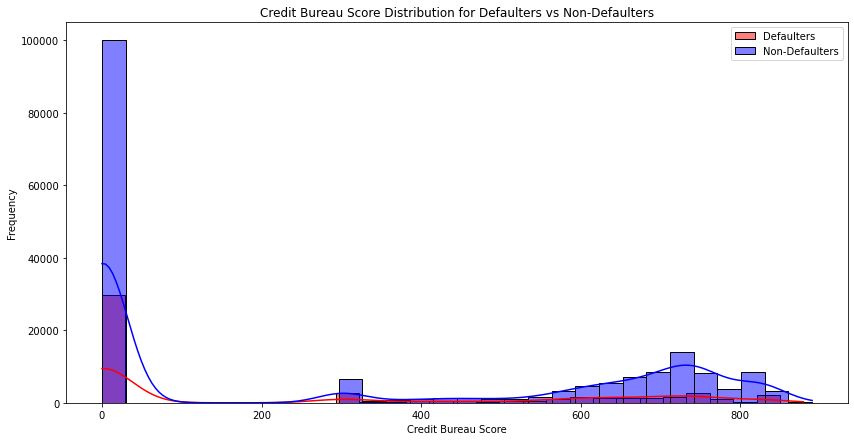

In [336]:
if len(unique_scores)> 1 or unique_scores[0] !=0:
    defaulters = df[df['loan_default'] ==1]
    non_defaulters = df[df['loan_default'] ==0]
    
    plt.figure(figsize=(14,7))
    sb.histplot(defaulters['perform_cns_score'], kde=True, color='red', label='Defaulters', bins=30)
    sb.histplot(non_defaulters['perform_cns_score'], kde=True, color='blue', label='Non-Defaulters', bins=30)
    plt.title('Credit Bureau Score Distribution for Defaulters vs Non-Defaulters')
    plt.xlabel('Credit Bureau Score')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()


In [337]:
credit_bureau_stats = df.groupby('loan_default')['perform_cns_score'].describe()
print(credit_bureau_stats)

                 count        mean         std  min  25%   50%    75%    max
loan_default                                                                
0             182543.0  299.784270  342.883794  0.0  0.0  15.0  690.0  890.0
1              50611.0  252.236372  318.826242  0.0  0.0   0.0  610.0  879.0


In [338]:
primary_features=['pri_no_of_accts', 'pri_active_accts', 'pri_overdue_accts',
       'pri_current_balance', 'pri_sanctioned_amount', 'pri_disbursed_amount']
secondary_features=['sec_no_of_accts', 'sec_active_accts', 'sec_overdue_accts',
       'sec_current_balance', 'sec_sanctioned_amount', 'sec_disbursed_amount']

primary_stats=df[primary_features].describe()
secondary_stats=df[secondary_features].describe()

print('Primary account details statistics:\n', primary_stats)
print('Secondary account details statistics:\n', secondary_stats)

Primary account details statistics:
        pri_no_of_accts  pri_active_accts  pri_overdue_accts  \
count    233154.000000     233154.000000      233154.000000   
mean          2.440636          1.039896           0.156549   
std           5.217233          1.941496           0.548787   
min           0.000000          0.000000           0.000000   
25%           0.000000          0.000000           0.000000   
50%           0.000000          0.000000           0.000000   
75%           3.000000          1.000000           0.000000   
max         453.000000        144.000000          25.000000   

       pri_current_balance  pri_sanctioned_amount  pri_disbursed_amount  
count         2.331540e+05           2.331540e+05          2.331540e+05  
mean          1.659001e+05           2.185039e+05          2.180659e+05  
std           9.422736e+05           2.374794e+06          2.377744e+06  
min          -6.678296e+06           0.000000e+00          0.000000e+00  
25%           0.000000e+0

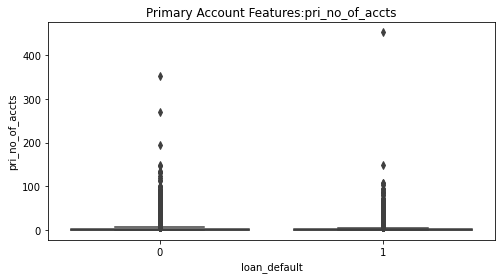

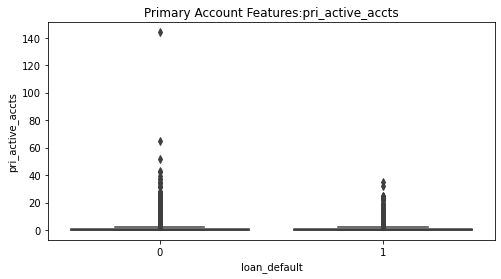

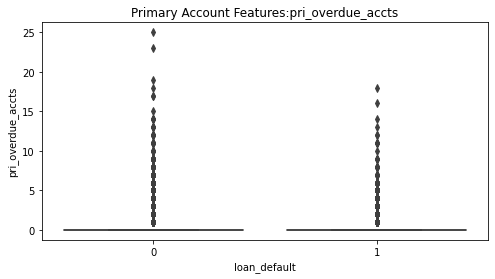

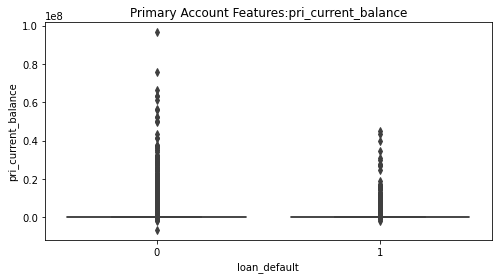

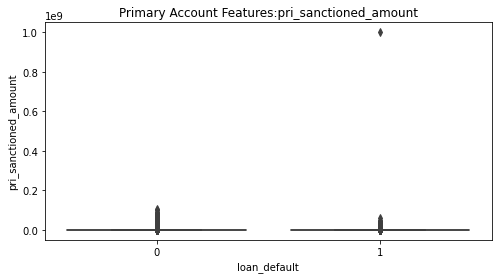

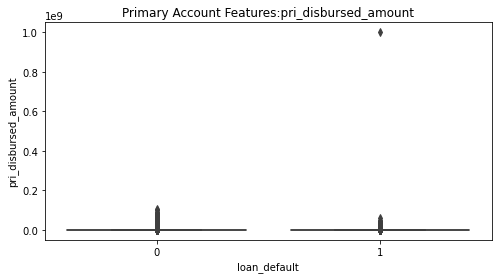

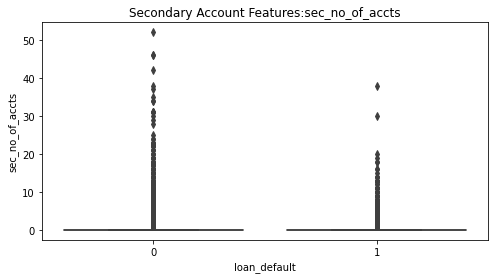

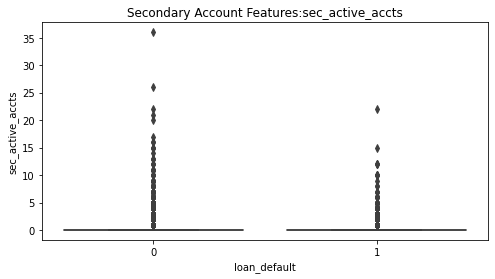

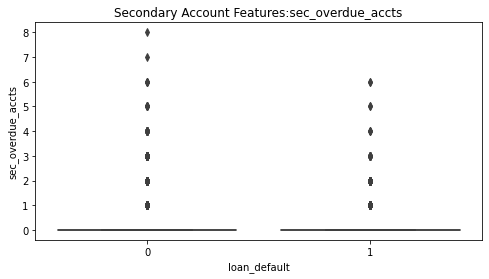

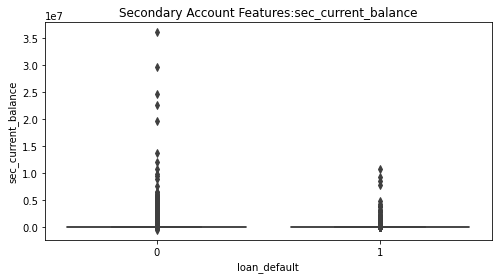

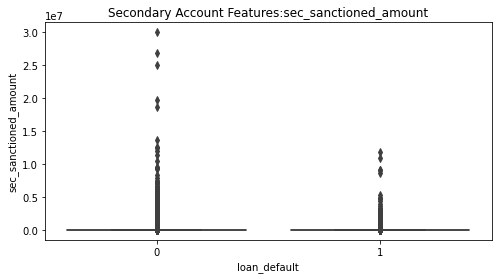

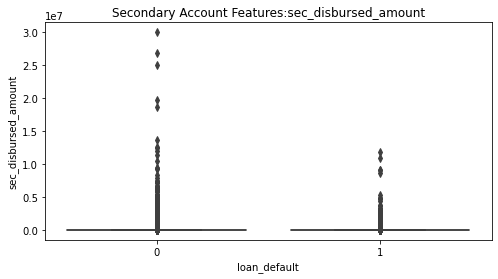


T-test for Primary Account Feautures:
T-test for pri_no_of_accts: t-statistic = -17.130915830054498, p-value= 9.576575137572993e-66
T-test for pri_active_accts: t-statistic = -20.031965549615496, p-value= 3.448627479875517e-89
T-test for pri_overdue_accts: t-statistic = 19.751692729232285, p-value= 9.138488408377107e-87
T-test for pri_current_balance: t-statistic = -13.228365028240567, p-value= 6.221337646272302e-40
T-test for pri_sanctioned_amount: t-statistic = -5.458812718452121, p-value= 4.798158421546997e-08
T-test for pri_disbursed_amount: t-statistic = -5.38685745320185, p-value= 7.17694223780049e-08

T-test for Secondary Account Feautures:
T-test for sec_no_of_accts: t-statistic = -4.048833036965914, p-value= 5.1490255376949666e-05
T-test for sec_active_accts: t-statistic = -2.8938669533252233, p-value= 0.0038056461524195186
T-test for sec_overdue_accts: t-statistic = -0.6617915245061897, p-value= 0.5081054926877384
T-test for sec_current_balance: t-statistic = -2.670944383381

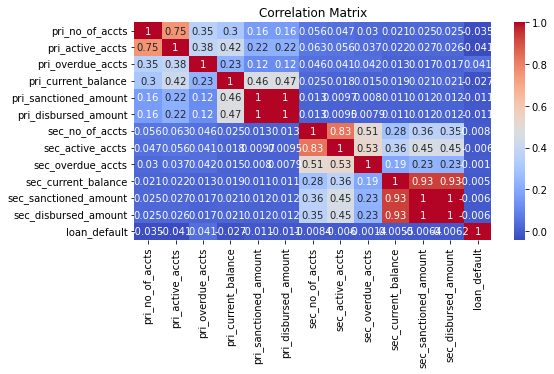

In [353]:
import scipy.stats as stats

def plot_features(features, target, title):
    for feature in features:
        plt.figure(figsize=(8,4))
        sb.boxplot(x=target, y=feature, data=df)
        plt.title(f'{title}:{feature}')
        plt.show()
        
plot_features(primary_features, 'loan_default', 'Primary Account Features')
plot_features(secondary_features, 'loan_default', 'Secondary Account Features')


def t_test_feature(features, target):
    for feature in features:
        default= df[df[target]==1][feature]
        non_default= df[df[target]==0][feature]
        t_stat, p_value =stats.ttest_ind(default, non_default, nan_policy = 'omit')
        print(f'T-test for {feature}: t-statistic = {t_stat}, p-value= {p_value}')
        
print("\nT-test for Primary Account Feautures:")
t_test_feature(primary_features, 'loan_default')
print("\nT-test for Secondary Account Feautures:")
t_test_feature(secondary_features, 'loan_default')
        
correlation_matrix = df[primary_features + secondary_features +['loan_default']].corr()
print("\nCorrelation Matrix:\n",correlation_matrix)

plt.figure(figsize=(8,4))
sb.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


Sanctioned Amount:
        pri_sanctioned_amount  sec_sanctioned_amount
count           2.331540e+05           2.331540e+05
mean            2.185039e+05           7.295923e+03
std             2.374794e+06           1.831560e+05
min             0.000000e+00           0.000000e+00
25%             0.000000e+00           0.000000e+00
50%             0.000000e+00           0.000000e+00
75%             6.250000e+04           0.000000e+00
max             1.000000e+09           3.000000e+07

Disbursed Amount:
        pri_disbursed_amount  sec_disbursed_amount
count          2.331540e+05          2.331540e+05
mean           2.180659e+05          7.179998e+03
std            2.377744e+06          1.825925e+05
min            0.000000e+00          0.000000e+00
25%            0.000000e+00          0.000000e+00
50%            0.000000e+00          0.000000e+00
75%            6.080000e+04          0.000000e+00
max            1.000000e+09          3.000000e+07


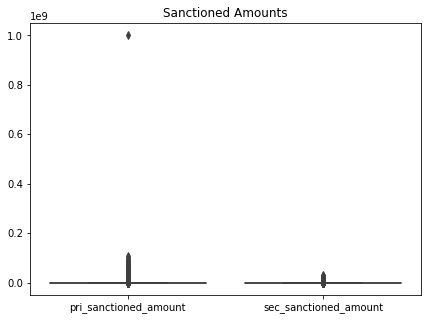

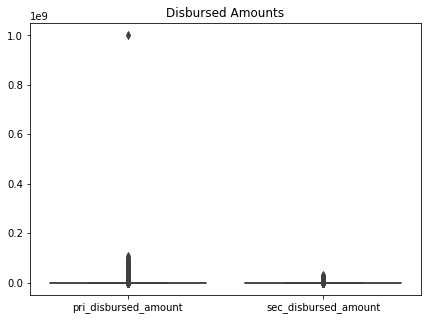

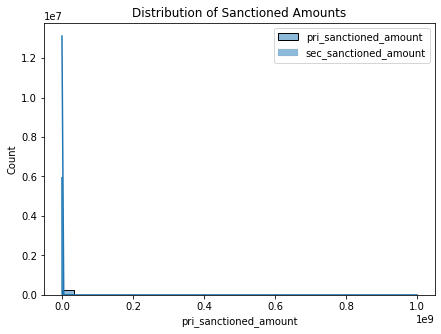

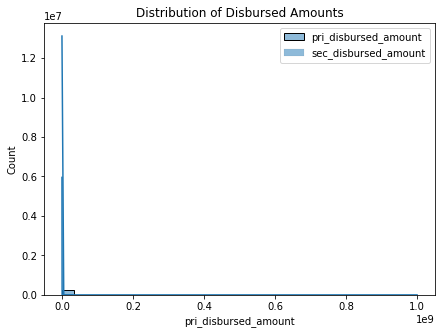


Primary Loan Sanctioned vs Disbursed Difference Statistics:
 count    2.331540e+05
mean     4.379567e+02
std      1.189795e+05
min     -5.000000e+07
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.444196e+06
Name: pri_amount_diff, dtype: float64

Secondary Loan Sanctioned vs Disbursed Difference Statistics:
 count    233154.000000
mean        115.925474
std        4895.640887
min     -149432.000000
25%           0.000000
50%           0.000000
75%           0.000000
max      865353.000000
Name: sec_amount_diff, dtype: float64


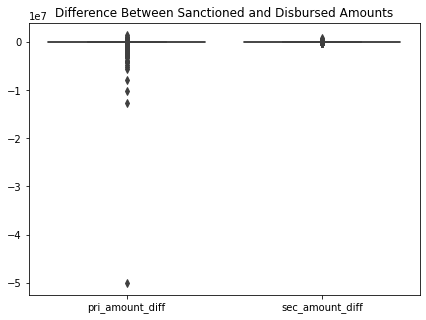

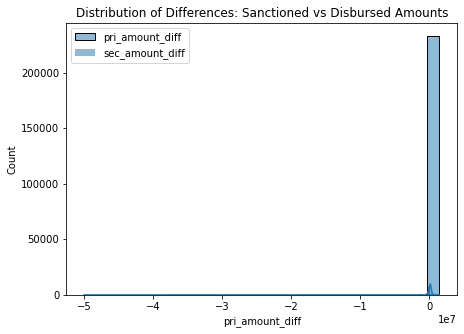


T-test for Primary Loan Difference: t-statistic = 1.7773813095170181, p-value = 0.07550682707997997
T-test for Secondary Loan Difference: t-statistic = 11.433804520338848, p-value = 2.8873358771164625e-30


In [356]:
sanctioned_amounts=['pri_sanctioned_amount', 'sec_sanctioned_amount']
disbursed_amounts=['pri_disbursed_amount', 'sec_disbursed_amount']


sanctioned_stats=df[sanctioned_amounts].describe()
disbursed_stats=df[disbursed_amounts].describe()

print("\nSanctioned Amount:\n",sanctioned_stats)
print("\nDisbursed Amount:\n",disbursed_stats)

def plot_boxplot(features, title):
    plt.figure(figsize=(7,5))
    sb.boxplot(data=df[features])
    plt.title(title)
    plt.show()
    
plot_boxplot(sanctioned_amounts, 'Sanctioned Amounts')
plot_boxplot(disbursed_amounts, 'Disbursed Amounts')

#visualise the data with histogram
def plot_histogram(features, title):
    plt.figure(figsize=(7,5))
    for feature in features:
        sb.histplot(df[feature], kde=True, label=feature, bins=30)
    plt.title(title)
    plt.legend()
    plt.show()

plot_histogram(sanctioned_amounts, 'Distribution of Sanctioned Amounts')
plot_histogram(disbursed_amounts, 'Distribution of Disbursed Amounts')

# Calculate the difference between sanctioned and disbursed amounts
df['pri_amount_diff'] = df['pri_sanctioned_amount'] - df['pri_disbursed_amount']
df['sec_amount_diff'] = df['sec_sanctioned_amount'] - df['sec_disbursed_amount']

# Describe the difference
pri_diff_stats = df['pri_amount_diff'].describe()
sec_diff_stats = df['sec_amount_diff'].describe()

print("\nPrimary Loan Sanctioned vs Disbursed Difference Statistics:\n", pri_diff_stats)
print("\nSecondary Loan Sanctioned vs Disbursed Difference Statistics:\n", sec_diff_stats)

# Plot the difference with a boxplot and histogram
plot_boxplot(['pri_amount_diff', 'sec_amount_diff'], 'Difference Between Sanctioned and Disbursed Amounts')
plot_histogram(['pri_amount_diff', 'sec_amount_diff'], 'Distribution of Differences: Sanctioned vs Disbursed Amounts')

# Perform t-test to check if the differences between sanctioned and disbursed amounts are statistically significant
t_stat_pri, p_value_pri = stats.ttest_1samp(df['pri_amount_diff'].dropna(), 0)
t_stat_sec, p_value_sec = stats.ttest_1samp(df['sec_amount_diff'].dropna(), 0)

print(f"\nT-test for Primary Loan Difference: t-statistic = {t_stat_pri}, p-value = {p_value_pri}")
print(f"T-test for Secondary Loan Difference: t-statistic = {t_stat_sec}, p-value = {p_value_sec}")

Inquiry Statistics for Defaulters:
 count    50611.000000
mean         0.265219
std          0.835147
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         19.000000
Name: no_of_inquiries, dtype: float64

Inquiry Statistics for Non-Defaulters:
 count    182543.000000
mean          0.190366
std           0.665536
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          36.000000
Name: no_of_inquiries, dtype: float64


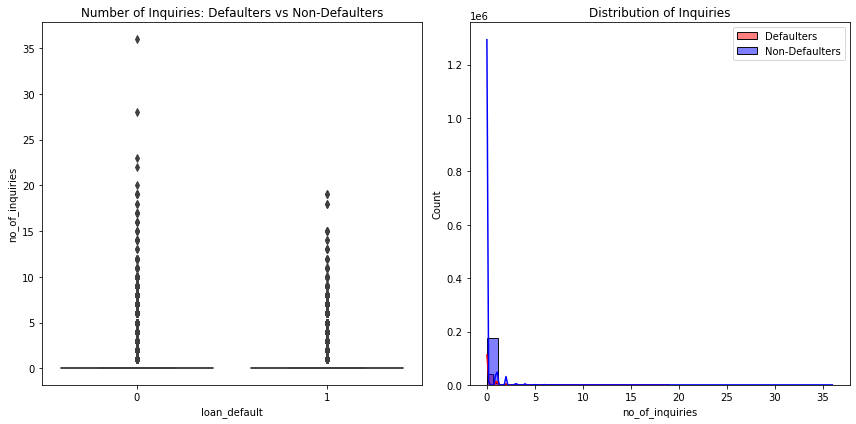

T-test result: t-statistic = 21.110344428166638, p-value = 7.912566786376203e-99


In [344]:
inquiry_stats_defaulters = df[df['loan_default'] == 1]['no_of_inquiries'].describe()
inquiry_stats_non_defaulters = df[df['loan_default'] == 0]['no_of_inquiries'].describe()

print("Inquiry Statistics for Defaulters:\n", inquiry_stats_defaulters)
print("\nInquiry Statistics for Non-Defaulters:\n", inquiry_stats_non_defaulters)

# Step 2: Visualize with boxplot and histogram
def plot_inquiries():
    plt.figure(figsize=(12, 6))

    # Boxplot
    plt.subplot(1, 2, 1)
    sb.boxplot(x='loan_default', y='no_of_inquiries', data=df)
    plt.title('Number of Inquiries: Defaulters vs Non-Defaulters')

    # Histogram
    plt.subplot(1, 2, 2)
    sb.histplot(df[df['loan_default'] == 1]['no_of_inquiries'], color='red', kde=True, label='Defaulters', bins=30)
    sb.histplot(df[df['loan_default'] == 0]['no_of_inquiries'], color='blue', kde=True, label='Non-Defaulters', bins=30)
    plt.title('Distribution of Inquiries')
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_inquiries()

# Step 3: T-test for the number of inquiries
defaulters_inquiries = df[df['loan_default'] == 1]['no_of_inquiries'].dropna()
non_defaulters_inquiries = df[df['loan_default'] == 0]['no_of_inquiries'].dropna()

t_stat, p_value = stats.ttest_ind(defaulters_inquiries, non_defaulters_inquiries, nan_policy='omit')

print(f"T-test result: t-statistic = {t_stat}, p-value = {p_value}")

       new_accts_in_last_six_months  delinquent_accts_in_last_six_months  \
count                 233154.000000                        233154.000000   
mean                       0.381833                             0.097481   
std                        0.955107                             0.384439   
min                        0.000000                             0.000000   
25%                        0.000000                             0.000000   
50%                        0.000000                             0.000000   
75%                        0.000000                             0.000000   
max                       35.000000                            20.000000   

       credit_history_length_months  average_acct_age_months   loan_default  
count                 233154.000000            233154.000000  233154.000000  
mean                      16.252404                 8.915764       0.217071  
std                       28.581255                15.106416       0.412252  
min

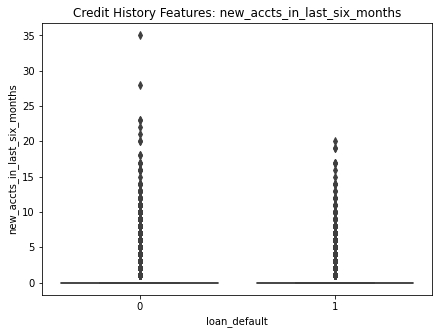

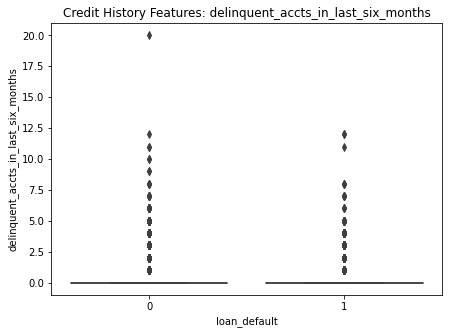

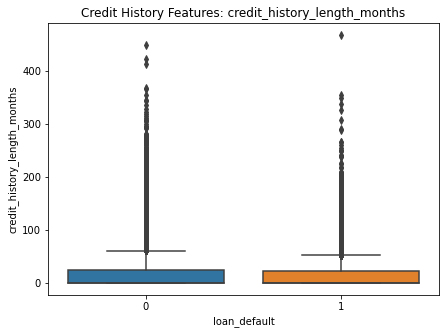

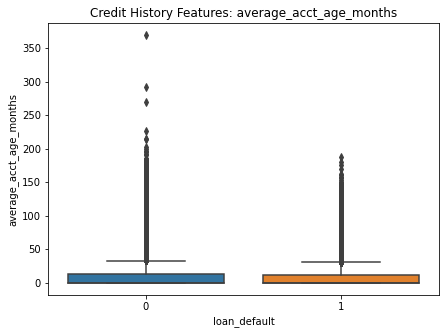

Average new_accts_in_last_six_months for Defaulters: 0.3285056608247219
Average new_accts_in_last_six_months for Non-Defaulters: 0.3966188788395063
Average delinquent_accts_in_last_six_months for Defaulters: 0.12264132303254233
Average delinquent_accts_in_last_six_months for Non-Defaulters: 0.09050470300148458
Average credit_history_length_months for Defaulters: 13.965797949062457
Average credit_history_length_months for Non-Defaulters: 16.886377456270576
Average average_acct_age_months for Defaulters: 8.204817134615004
Average average_acct_age_months for Non-Defaulters: 9.112877513791272
T-test for new_accts_in_last_six_months: t-statistic = -14.202014495523946, p-value = 9.302293710212261e-46
T-test for delinquent_accts_in_last_six_months: t-statistic = 16.649971389459616, p-value = 3.2892517686894386e-62
T-test for credit_history_length_months: t-statistic = -20.35898474060458, p-value = 4.6500173864982836e-92
T-test for average_acct_age_months: t-statistic = -11.969316978054648, p-

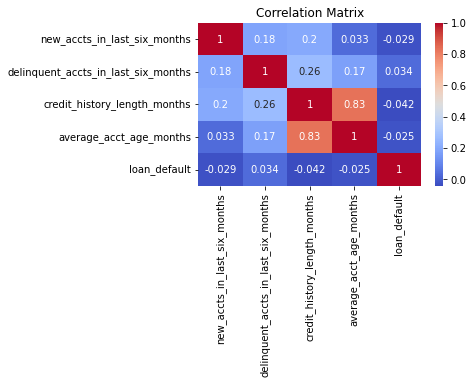

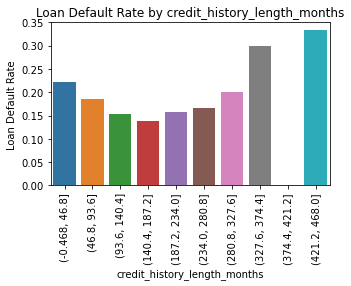

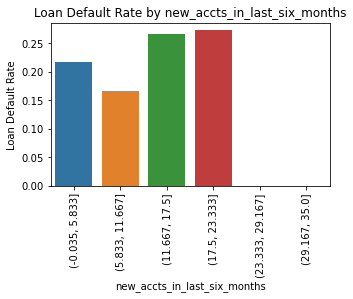

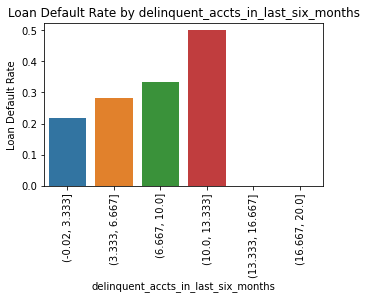

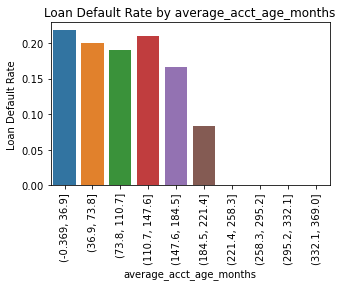

In [360]:
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from scipy import stats

def convert_to_months(age_str):
    if pd.isnull(age_str):
        return 0
    years = int(re.search(r'(\d+)yrs', age_str).group(1)) if 'yrs' in age_str else 0
    months = int(re.search(r'(\d+)mon', age_str).group(1)) if 'mon' in age_str else 0
    return years * 12 + months

df['credit_history_length_months'] = df['credit_history_length'].apply(convert_to_months)
df['average_acct_age_months'] = df['average_acct_age'].apply(convert_to_months)

credit_history_columns = ['new_accts_in_last_six_months', 'delinquent_accts_in_last_six_months', 'credit_history_length_months', 'average_acct_age_months']
print(df[credit_history_columns + ['loan_default']].describe())

def plot_features(features, target, title_prefix):
    for feature in features:
        plt.figure(figsize=(7,5))
        sb.boxplot(x=target, y=feature, data=df)
        plt.title(f'{title_prefix}: {feature}')
        plt.xlabel(target)
        plt.ylabel(feature)
        plt.show()

plot_features(credit_history_columns, 'loan_default', 'Credit History Features')

for feature in credit_history_columns:
    avg_default = df[df['loan_default'] == 1][feature].mean()
    avg_non_default = df[df['loan_default'] == 0][feature].mean()

    print(f'Average {feature} for Defaulters: {avg_default}')
    print(f'Average {feature} for Non-Defaulters: {avg_non_default}')

def t_test_features(features, target):
    for feature in features:
        default = df[df[target] == 1][feature]
        non_default = df[df[target] == 0][feature]
        t_stat, p_value = stats.ttest_ind(default, non_default, nan_policy='omit')
        print(f'T-test for {feature}: t-statistic = {t_stat}, p-value = {p_value}')

t_test_features(credit_history_columns, 'loan_default')

# Correlation analysis
correlation_matrix = df[credit_history_columns + ['loan_default']].corr()
print("\nCorrelation Matrix:\n", correlation_matrix)

# Heatmap for correlation matrix
plt.figure(figsize=(5,3))
sb.heatmap(correlation_matrix, annot=True, cmap='coolwarm')  # Fixed typo
plt.title('Correlation Matrix')
plt.show()

# Visualize the relationship between credit history features and loan default rate using bar plots
def plot_barplot(feature, target, bins):
    df[f'{feature}_bins'] = pd.cut(df[feature], bins=bins)
    default_rate_by_feature = df.groupby(f'{feature}_bins')[target].mean().reset_index()

    plt.figure(figsize=(5,3))
    sb.barplot(x=f'{feature}_bins', y=target, data=default_rate_by_feature)
    plt.title(f'Loan Default Rate by {feature}')
    plt.xlabel(feature)
    plt.ylabel('Loan Default Rate')
    plt.xticks(rotation=90)
    plt.show()

    df.drop(columns=[f'{feature}_bins'], inplace=True)

feature_bins = {
    'credit_history_length_months': 10,
    'new_accts_in_last_six_months': 6,
    'delinquent_accts_in_last_six_months': 6,
    'average_acct_age_months': 10
}

for feature, bins in feature_bins.items():
    plot_barplot(feature, 'loan_default', bins=bins)

In [346]:
import pandas as pd 
import numpy as np 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score 
from sklearn.preprocessing import StandardScaler, LabelEncoder


#convert '0yrs mon' foreat to total months for 'credit_history_length' and 'average_acct_age 
def convert_to_months(age_str):
    if pd.isnull(age_str):
        return 0
    years = int(re.search(r'(\d+)yrs', age_str).group(1)) if 'yrs' in age_str else 0
    months = int(re.search(r'(\d+)mon', age_str).group(1)) if 'mon' in age_str else 0
    return years * 12 + months

df['credit_history_length_months'] = df['credit_history_length'].apply(convert_to_months)
df['average _acct_age_months'] = df['average_acct_age'].apply(convert_to_months)


features=['disbursed_amount', 'asset_cost', 'ltv', 'branch_id', 'supplier_id',
'manufacturer_id', 'current_pincode_id', 'date_of_birth', 'employment_type',
'disbursaldate', 'state_id', 'employee_code_id', 'mobileno_avl_flag',
'aadhar_flag', 'pan_flag', 'voterid_flag', 'driving_flag', 'passport_flag',
'perform_cns_score','pri_no_of_accts', 'pri_active_accts', 'pri_overdue_accts',
'pri_current_balance', 'pri_sanctioned_amount', 'pri_disbursed_amount',
'sec_no_of_accts', 'sec_active_accts', 'sec_overdue_accts', 'sec_current_balance',
'sec_sanctioned_amount','sec_disbursed_amount', 'primary_installment_amount','secondary_installment_amount',
'new_accts_in_last_six_months', 'delinquent_accts_in_last_six_months', 'average_acct_age_months',
'credit_history_length_months', 'no_of_inquiries', 'age', 'pri_amount_diff', 'sec_amount_diff']

target = 'loan_default'

#Encode categorical variables
label_encoders = {}
for column in ['employment_type', "date_of_birth", 'disbursaldate']:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le
    
# Split the dataset into training and testing sets
x= df[features]
y = df[target]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=42)

#Standardize the features
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Train a logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(x_train, y_train)

# Predict the outcomes for the test data
y_pred = model.predict(x_test)

#Validate the results using a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

#Classification report
class_report = classification_report(y_test, y_pred)
print('\nClassification Report:')
print(class_report)

# Accuracy score 
accuracy = accuracy_score(y_test, y_pred)
print('\nAccuracy Score:')
print(accuracy)

Confusion Matrix:
[[36646    87]
 [ 9845    53]]

Classification Report:
              precision    recall  f1-score   support

           0       0.79      1.00      0.88     36733
           1       0.38      0.01      0.01      9898

    accuracy                           0.79     46631
   macro avg       0.58      0.50      0.45     46631
weighted avg       0.70      0.79      0.70     46631


Accuracy Score:
0.7870086423194871
